In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from insitupy import read_xenium
import subprocess
import numpy as np
import scanpy as sc
import anndata
from anndata import AnnData
from matplotlib import pyplot as plt 
import matplotlib as matplotlib
import seaborn as sns
import os
import monkeybread as mb

/Users/isabelgiray/anaconda3/envs/insitupy/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
xd = read_xenium("/Users/isabelgiray/0017313__N-486-22-T__baysor__transfer")

In [4]:
xd.load_cells()
xd.load_images()

Loading cells...
	Found alternative cells...
Loading images...


In [5]:
xd.alt["baysor"]

matrix
    AnnData object with n_obs × n_vars = 133945 × 314
    obs: 'CellID', 'area', 'avg_assignment_confidence', 'avg_confidence', 'cluster', 'density', 'elongation', 'lifespan', 'max_cluster_frac', 'n_transcripts', 'z', 'n_genes_by_counts', 'total_counts', 'leiden', 'OT_abs', 'OT_scadata_abs', 'OT_scadata_max'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'OT_abs_colors', 'OT_scadata_abs_colors', 'counts_location', 'leiden', 'neighbors', 'pca', 'umap'
    obsm: 'OT', 'OT_scadata', 'X_pca', 'X_umap', 'spatial'
    varm: 'OT', 'OT_scadata', 'PCs'
    layers: 'counts', 'norm_counts'
    obsp: 'connectivities', 'distances'
boundaries
    BoundariesData object with 1 entry:
        cellular

In [6]:
adata = xd.alt["baysor"].matrix

In [7]:
adata.obsm["X_spatial"] = adata.obsm["spatial"]
adata.obsm

AxisArrays with keys: OT, OT_scadata, X_pca, X_umap, spatial, X_spatial

# Really Microglia cluster?

In [98]:
dict1 = {"0":"not","1":"not","2":"not","3":"not","4":"not","5":"not","6":"not","7":"not","8":"not","9":"not","10":"not","11":"not","13":"not","14":"not","15":"not","16":"not","12":"Microglia?"}
adata1 = adata
adata1.obs["own_annotation_1"] = [dict1[elem] if elem in dict1 else elem for elem in adata1.obs["leiden"]]


/Users/isabelgiray/anaconda3/envs/insitupy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/isabelgiray/anaconda3/envs/insitupy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


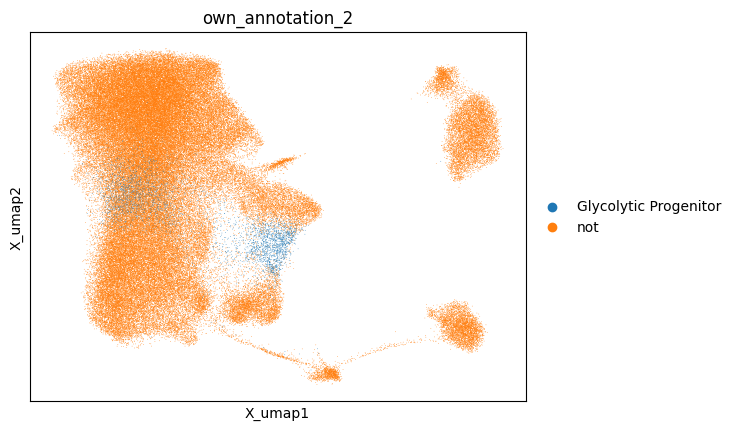

In [99]:
sc.pl.embedding(
    adata1,
    "X_umap",
    color = ['own_annotation_2'],
    wspace=0.4,
    s=1,
    palette=sc.pl.palettes.vega_20_scanpy,
    show=False
)
plt.show()

In [87]:
dict1 = {"B Cells":"not","CGE iN":"not","Dividing B Cells":"not","Dividing Neuron":"not","Dividing OPC":"not","Dividing Progenitor":"not","Endothelial":"not","Radial Glia":"not","Immature Astrocyte":"not","Mature IPC/Newborn Neuron":"not","Mixed Progenitor/Neuron":"not","Neuron":"not","OPC":"not","Oligodendrocyte":"not","Pericyte":"not","Protoplasmic Astrocyte":"not","Microglia":"not","Red blood cells":"not","Tumor Associated Macrophage":"not","Unknown":"not","Glycolytic Progenitor":"Glycolytic Progenitor"}
adata1 = adata
adata1.obs["own_annotation_2"] = [dict1[elem] if elem in dict1 else elem for elem in adata1.obs["OT_scadata_abs"]]

/Users/isabelgiray/anaconda3/envs/insitupy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/isabelgiray/anaconda3/envs/insitupy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


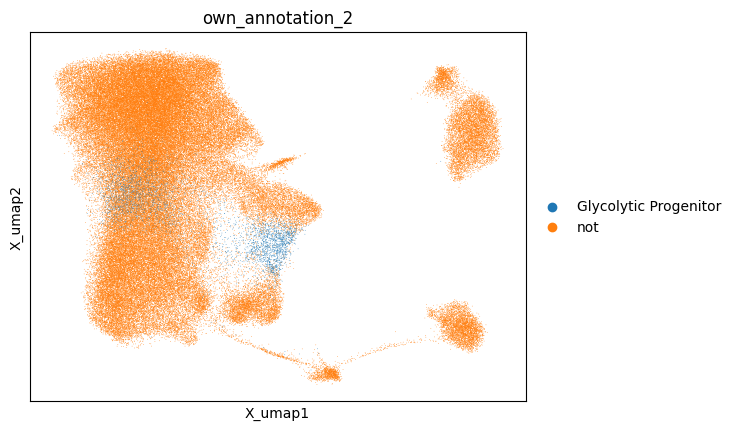

In [88]:
sc.pl.embedding(
    adata,
    "X_umap",
    color = ['own_annotation_2'],
    wspace=0.4,
    s=1,
    palette=sc.pl.palettes.vega_20_scanpy,
    show=False
)
plt.show()

# Add own annotation column

In [15]:
rename_dict = {"14":"Endothelial 1", "6":"Endothelial 2","10":"Endothelial 3","2":"Undefined","3":"Microglia 1","4":"Microglia 2","8":"Microglia 3","12":"Microglia 4","1":"Radial Glia-like 1","0":"Astrocyte-like","5":"Radial Glia-like 2"}
adata.obs["own_annotation"] = [rename_dict[elem] if elem in rename_dict else elem for elem in adata.obs["leiden"]]

/Users/isabelgiray/anaconda3/envs/insitupy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/isabelgiray/anaconda3/envs/insitupy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


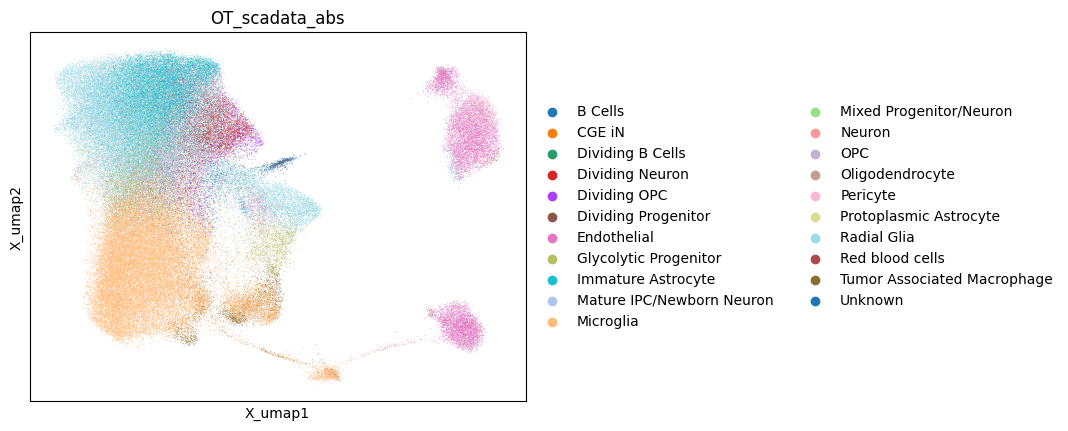

In [10]:
#fig, ax = plt.subplots(1, 1, figsize=(5,5))
sc.pl.embedding(
    adata,
    "X_umap",
    color = ['OT_scadata_abs'],
    wspace=0.4,
    s=1,
    palette=sc.pl.palettes.vega_20_scanpy,
    show=False
)
plt.show()

/Users/isabelgiray/anaconda3/envs/insitupy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/isabelgiray/anaconda3/envs/insitupy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


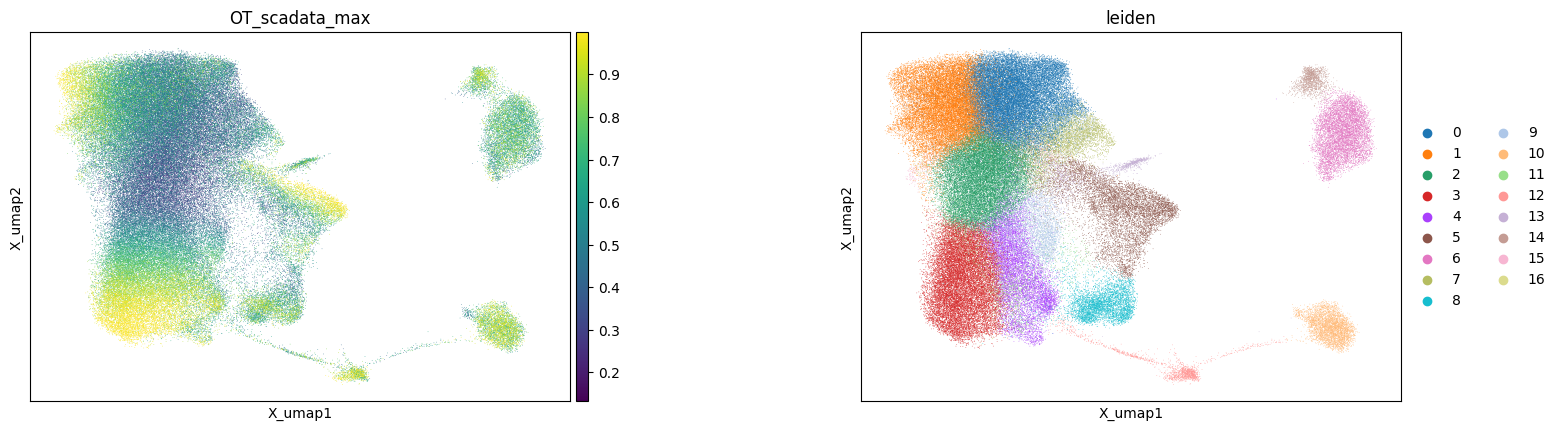

In [11]:
sc.pl.embedding(
    adata,
    "X_umap",
    color = ['OT_scadata_max','leiden'],
    wspace=0.4,
    s=1,
    palette=sc.pl.palettes.vega_20_scanpy,
    show=False
)
plt.show()

/Users/isabelgiray/anaconda3/envs/insitupy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/isabelgiray/anaconda3/envs/insitupy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


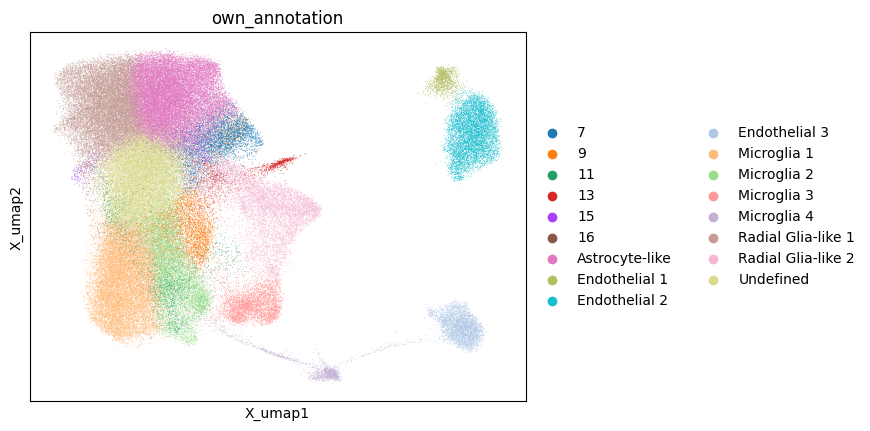

In [16]:
sc.pl.embedding(
    adata,
    "X_umap",
    color = ['own_annotation'],
    wspace=0.4,
    s=1,
    palette=sc.pl.palettes.vega_20_scanpy,
    show=False
)
plt.show()

# Zoom in and subset the data.

/Users/isabelgiray/anaconda3/envs/insitupy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/isabelgiray/anaconda3/envs/insitupy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/isabelgiray/anaconda3/envs/insitupy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = 

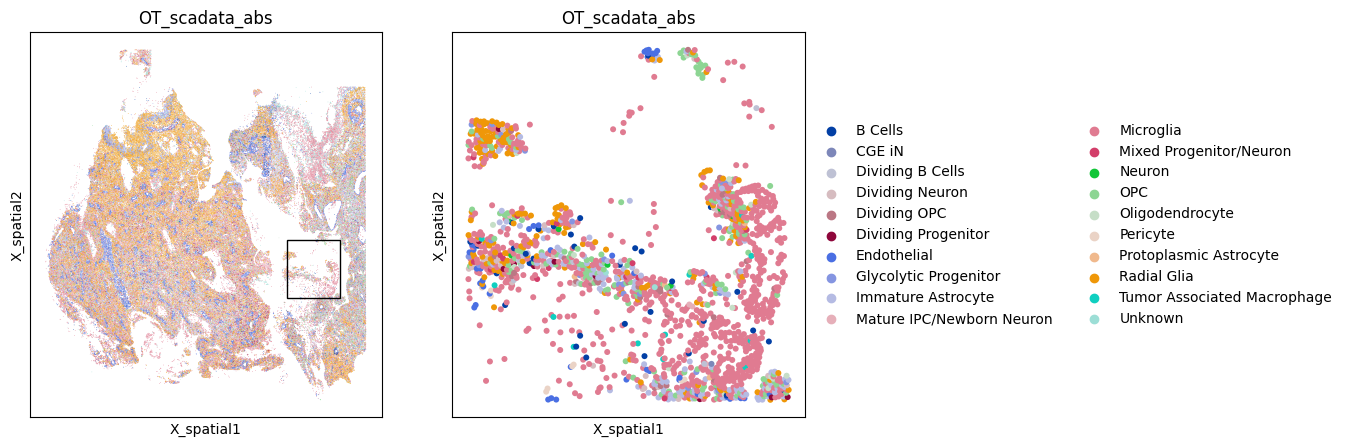

In [12]:
LEFT_PCT = 73
TOP_PCT = 54
WIDTH_PCT = 15
HEIGHT_PCT = 15

fig, axarr = plt.subplots(1,2,figsize=(10,5))
adata_zoom = mb.plot.embedding_zoom(
    adata, 
    left_pct=LEFT_PCT,
    top_pct=TOP_PCT, 
    width_pct=WIDTH_PCT,
    height_pct=HEIGHT_PCT,
    color='OT_scadata_abs', 
    mask=None, 
    basis = 'X_spatial', 
    palette=sc.pl.palettes.default_28,
    show=True,
    axs=axarr
);

# Plot density of cells of a given cell type  
Visualize density of a given cell type.

100%|██████████| 133945/133945 [16:05<00:00, 138.68it/s]


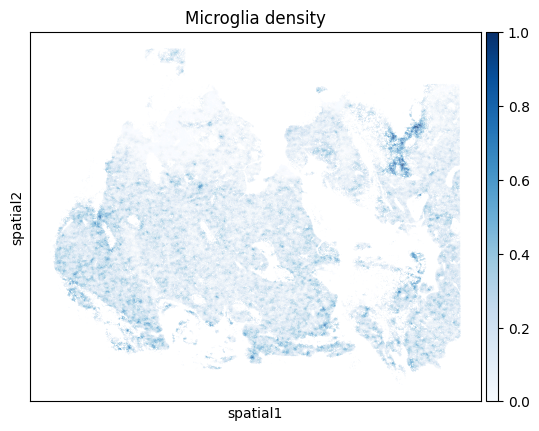

In [13]:
density_key = mb.calc.cell_density(
    adata,
    'OT_scadata_abs',
    'Microglia',
    bandwidth=25, 
    approx=False,
    radius_threshold=250
)
mb.plot.cell_density(
    adata,
    density_key,
    cmap='Blues',
    title=f'Microglia density'
)

100%|██████████| 134704/134704 [04:35<00:00, 488.34it/s]
/Users/isabelgiray/anaconda3/envs/insitupy/lib/python3.9/site-packages/monkeybread/calc/_cell_density.py:159: RuntimeWarning: invalid value encountered in divide
  cell_densities = (densities - densities.min()) / (densities.max() - densities.min())


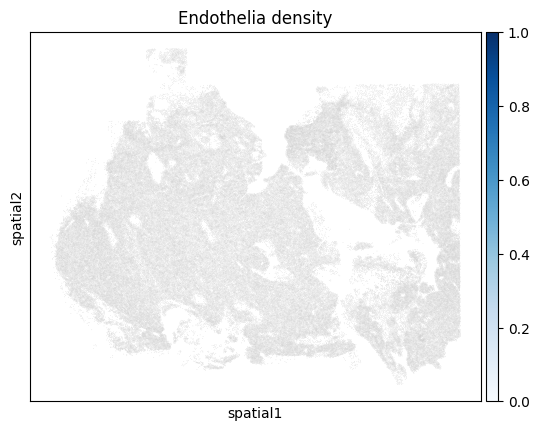

In [156]:
density_key = mb.calc.cell_density(
    adata,
    'OT_scadata_abs',
    'Endothelia',
    bandwidth=25,
    approx=False,
    radius_threshold=250
)
mb.plot.cell_density(
    adata,
    density_key,
    cmap='Blues',
    title=f'Endothelia density'
)

It is also possible to choose some cell-types and compare them in one picture.

# Preprocessing

In [ ]:
sc.pp.filter_cells(adata, min_counts = 50, inplace = True)
sc.pp.normalize_total(adata, target_sum = 1000000, inplace = True)
sc.pp.log1p(adata)
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata, key_added = "clusters")

/Users/isabelgiray/anaconda3/envs/insitupy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/isabelgiray/anaconda3/envs/insitupy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/isabelgiray/anaconda3/envs/insitupy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = 

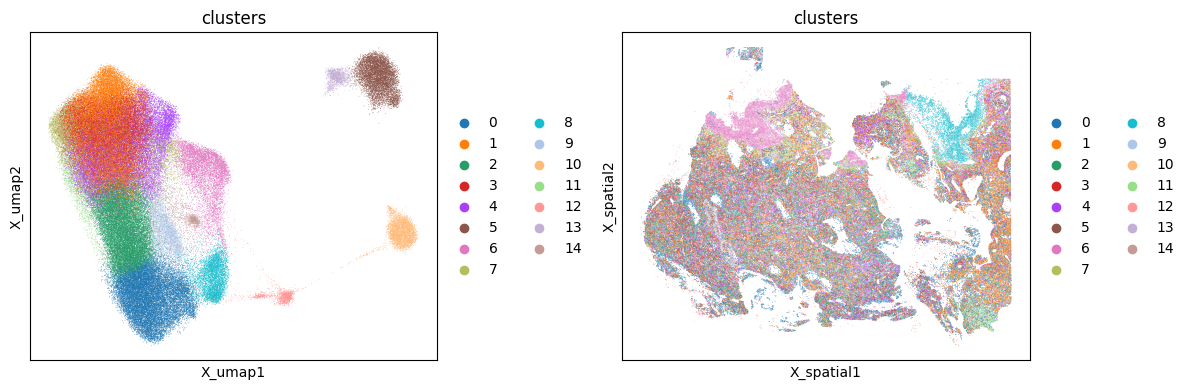

In [18]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))
sc.pl.embedding(
    adata,
    "X_umap",
    color = "clusters",
    ax = axs[0],
    show = False
)
sc.pl.embedding(
    adata,
    "X_spatial",
    color = "clusters",
    ax = axs[1],
    show = False
)
plt.tight_layout()
plt.show()

# Niche analysis

In [9]:
rename_dict = {"14":"Endothelial", "6":"Endothelial","10":"Endothelial","2":"Undefined","3":"Microglia","4":"Microglia","8":"Microglia","12":"Microglia","1":"Radial Glia-like","0":"Astrocyte-like","5":"Radial Glia-like","7":"Undefined","9":"Undefined","11":"Undefined","13":"Undefined","15":"Undefined","16":"Undefined"}
adata.obs["Niche Celltypes"] = [rename_dict[elem] if elem in rename_dict else elem for elem in adata.obs["leiden"]]
adata.obs["Niche Celltypes"] = adata.obs["Niche Celltypes"].astype('category')

/Users/isabelgiray/anaconda3/envs/insitupy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/isabelgiray/anaconda3/envs/insitupy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


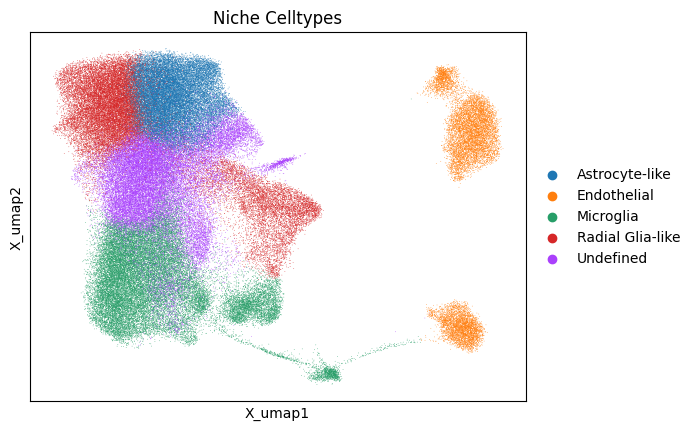

In [10]:
sc.pl.embedding(
    adata,
    "X_umap",
    color = ["Niche Celltypes"],
    wspace=0.4,
    s=1,
    palette=sc.pl.palettes.vega_20_scanpy,
    show=False
)
plt.show()

In [31]:
# Compute niches
mask = ~adata.obs['Niche Celltypes'].isin([
    'Microglia', 'Endothelial','Undefined'
])

adata_neighbors = mb.calc.cellular_niches(
    adata,
    cell_type_key='Niche Celltypes',
    radius=75,
    normalize_counts=True,
    standard_scale=True,
    clip_min=-5,
    clip_max=5,
    mask=mask,
    n_neighbors=100,
    resolution=0.25,
    min_niche_size=400,
    key_added='niche',
    non_niche_value='Undefined'
)

Computing neighborhood profiles...


/Users/isabelgiray/anaconda3/envs/insitupy/lib/python3.9/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


Clustering neighborhood profiles...
Generating niches...


/Users/isabelgiray/anaconda3/envs/insitupy/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


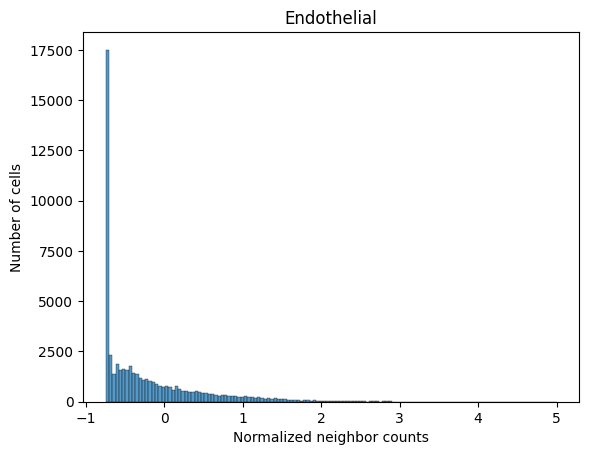

/Users/isabelgiray/anaconda3/envs/insitupy/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


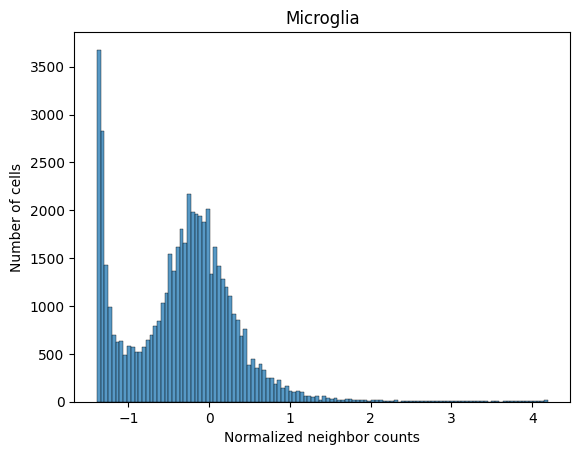

/Users/isabelgiray/anaconda3/envs/insitupy/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


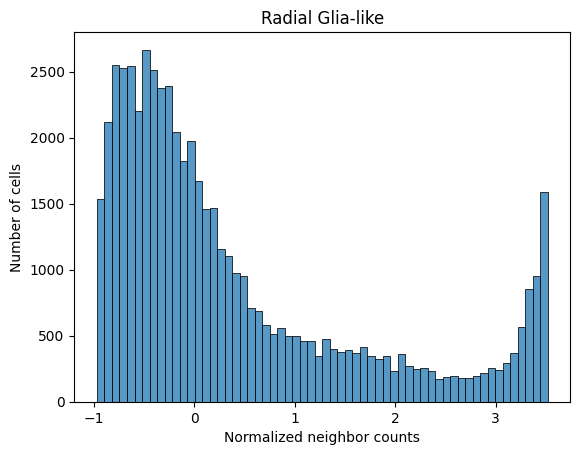

/Users/isabelgiray/anaconda3/envs/insitupy/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


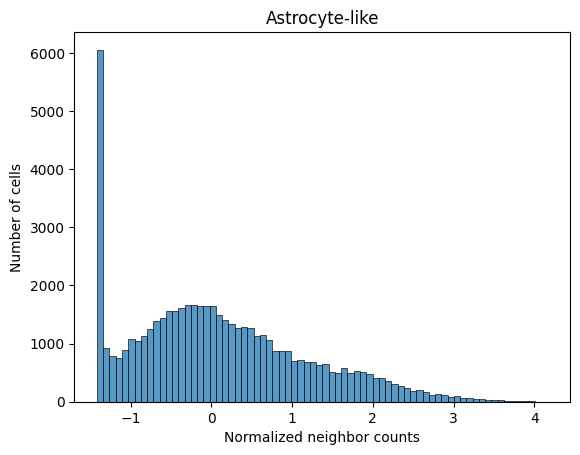

/Users/isabelgiray/anaconda3/envs/insitupy/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


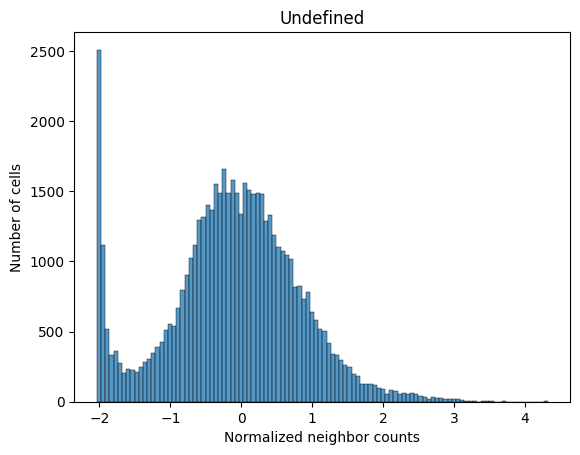

In [32]:
sns.histplot(adata_neighbors.obs_vector('Endothelial'))
plt.xlabel('Normalized neighbor counts')
plt.ylabel('Number of cells')
plt.title('Endothelial')
plt.show()

sns.histplot(adata_neighbors.obs_vector('Microglia'))
plt.xlabel('Normalized neighbor counts')
plt.ylabel('Number of cells')
plt.title('Microglia')
plt.show()

sns.histplot(adata_neighbors.obs_vector('Radial Glia-like'))
plt.xlabel('Normalized neighbor counts')
plt.ylabel('Number of cells')
plt.title('Radial Glia-like')
plt.show()

sns.histplot(adata_neighbors.obs_vector('Astrocyte-like'))
plt.xlabel('Normalized neighbor counts')
plt.ylabel('Number of cells')
plt.title('Astrocyte-like')
plt.show()

sns.histplot(adata_neighbors.obs_vector('Undefined'))
plt.xlabel('Normalized neighbor counts')
plt.ylabel('Number of cells')
plt.title('Undefined')
plt.show()



In [34]:
adata_neighbors.obs["niche"]

CRa95725001-85        3
CRa95725001-180       3
CRa95725001-193       3
CRa95725001-285       1
CRa95725001-289       3
                     ..
CRa95725001-190803    0
CRa95725001-191365    6
CRa95725001-191538    0
CRa95725001-193245    1
CRa95725001-194542    0
Name: niche, Length: 32897, dtype: object

In [29]:
adata_neighbors.obs_vector

<bound method AnnData.obs_vector of AnnData object with n_obs × n_vars = 32897 × 5
    obs: 'n_neighbors', 'Niche Celltypes', 'leiden', 'niche'
    var: 'mean', 'std'
    uns: 'neighbor_radius', 'neighbors', 'leiden'
    obsm: 'X_spatial'
    obsp: 'distances', 'connectivities'>

/Users/isabelgiray/anaconda3/envs/insitupy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/isabelgiray/anaconda3/envs/insitupy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


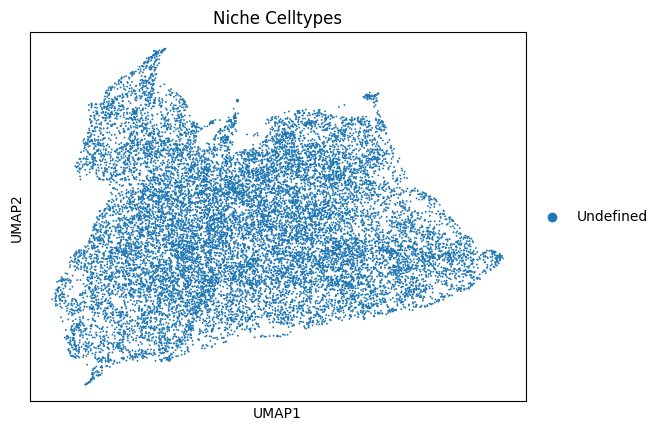

/Users/isabelgiray/anaconda3/envs/insitupy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/isabelgiray/anaconda3/envs/insitupy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


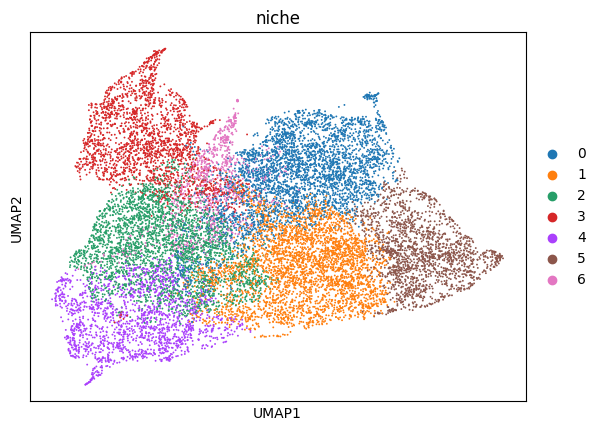

In [33]:
# Subset cells
#adata_neighbors_sub = sc.pp.subsample(
#    adata_neighbors, fraction=1/2, copy=True
#)

# Generate UMAP plots
sc.tl.umap(adata_neighbors_sub)
sc.pl.umap(
    adata_neighbors_sub, 
    color='Niche Celltypes', 
    palette=sc.pl.palettes.vega_20_scanpy
)
sc.pl.umap(
    adata_neighbors_sub, 
    color='niche', 
    palette=sc.pl.palettes.vega_20_scanpy
)

In [ ]:
adata_neighbors_sub.var_names

Plot the tissue colored by niches.

/Users/isabelgiray/anaconda3/envs/insitupy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/isabelgiray/anaconda3/envs/insitupy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


<Axes: title={'center': 'niche'}, xlabel='X_spatial1', ylabel='X_spatial2'>

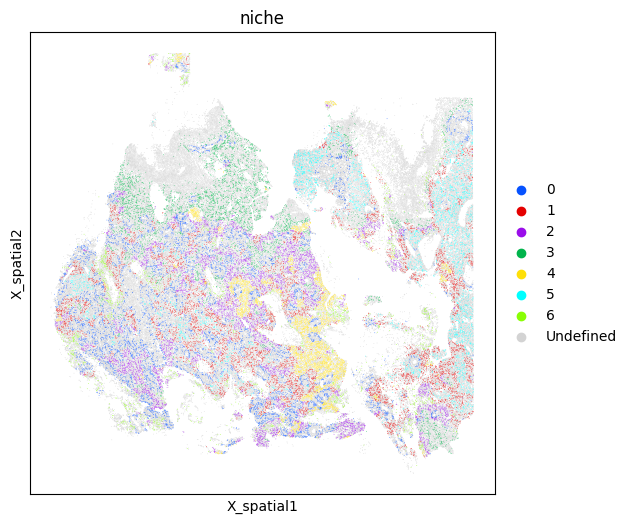

In [15]:
niche_to_color = {
    val: mb.plot.monkey_palette[i]
    for i, val in enumerate(sorted(set(adata_neighbors.obs['niche'])))
}
niche_to_color['Undefined'] = 'lightgrey'

fig, ax = plt.subplots(1,1,figsize=(6,6))
sc.pl.embedding(
    adata,
    "X_spatial",
    color = 'niche',
    palette=niche_to_color,
    s=1,
    ax=ax,
    show=False
)

A value of zero for a given cell type indicates that the normalized number of neighbors equals the mean number of neighbors. A value of 1 indicates that the normalized number of neighbors is one standard deviation above the mean.

In [22]:
include_niches=[ # Exclude the miscellaneous niches from the plot
    niche 
    for niche in set(adata_neighbors.obs['niche'])
    if niche != 'Undefined']
include_niches

['1', '2', '4', '3', '5', '6', '0']

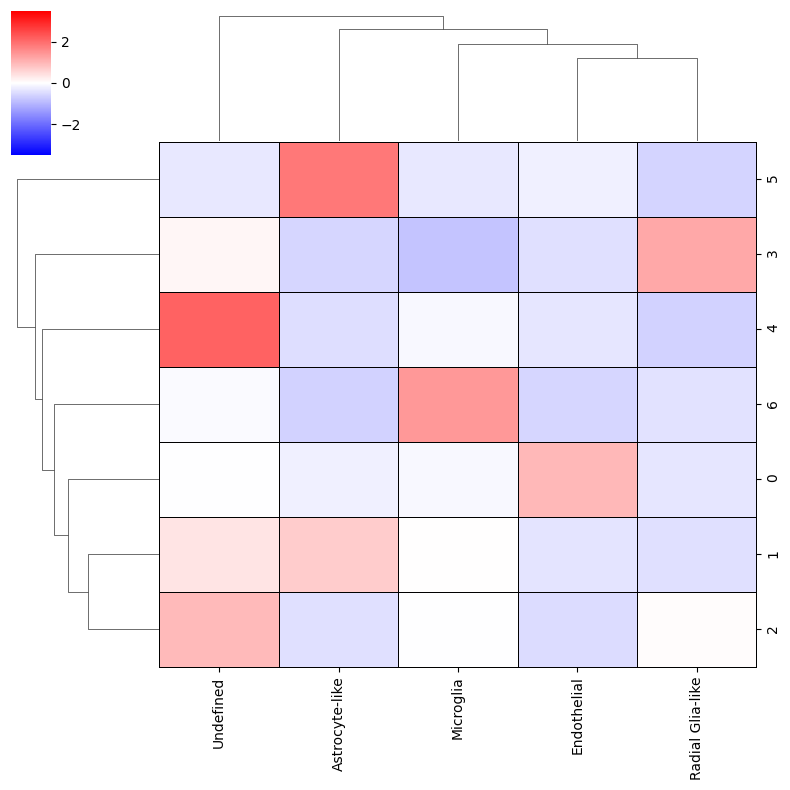

In [16]:
mb.plot.neighbors_profile_matrixplot(
    adata_neighbors,
    'niche',
    include_niches=[ # Exclude the miscellaneous niches from the plot
        niche 
        for niche in set(adata_neighbors.obs['niche'])
        if niche != 'malignant/other'
    ],
    clustermap_kwargs={
        'linewidths': 0.5,
        'linecolor': 'black',
        'cmap': 'bwr',
        'clip_on': False,
        'vmin': -3.5,
        'vmax': 3.5,
        'figsize': (8,8)
    }
)

Heatmap plotting the mean, normalized neighbor count of each cell type within each niche.